# What to do
 - Familiarize yourself with structural keys, if you haven't already in the lectures :) Some resources are Daylight Theory [here](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html) and Dalke's website [here](http://www.dalkescientific.com/writings/NBN/fingerprints.html)
 - Try to make a small structural key of your own, and characterize your set of ligands using this key
 - Have a look at the MACCS key, characterize both your structure set and DrugBank using MACCS key
 - Which MACCS bits are significantly more/less common in your ligand set in comparison to DrugBank?
 - What substructures do these bits [correspond to](https://github.com/openbabel/openbabel/blob/master/data/MACCS.txt)? Some additional materials on how to interpret SMARTS are [here](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html) and [here](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html).

# Co udělat

- Seznamte se se strukturálními klíči, pokud jste tak ještě neučili na přednáškách :) Některé zdroje jsou teorie denního chleba [here](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html) a Dalkeho web [zde](http://www.dalkescientific.com/writings/NBN/fingerprints.html).
- Pokuste se vytvořit vlastní malý strukturální klíč a pomocí tohoto klíče charakterizujte svoji sadu ligandů
- Podívejte se na klíč MACCS a pomocí klíče MACCS charakterizujte svou strukturu a DrugBank
- Které bity MACCS jsou ve vaší sadě ligandů podstatně více / méně běžné ve srovnání s DrugBank?
- Jakým substrukturám tyto bity [odpovídají](https://github.com/openbabel/openbabel/blob/master/data/MACCS.txt)? Některé další materiály, jak interpretovat SMARTS, jsou [here](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html) and [here](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html).

# Strukturní klíče

Last time, we dealt with substructures and substructure-based filters. An extension of this concept is assembling a set of several such substructures, which can be searched as a whole against any molecule. As the normal substructure search returns binary results (True or False whether the substructure is contained within the given molecule), searching for a set of substructures within a given molecule produces a set of binary values. This set of binary values can be assembled into a binary vector, where each substructure is represented by a corresponding single bit within the vector. This defined set of substructures, called a structural key or substructure key, allows to characterize any given molecule by a binary vector. Structural keys are basically premade substructure searches that can be used to accelerate structure-related database queries, to quickly compare chemical structures to each other, and to map the feature space of a set of structures, among many other things. More details on structural keys and their applied use are available in the [denní chléb](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html). Pretty much any computational method that works on binary vectors can be used on structural keys. Let's make a structural key of our own:

Naposledy jsme se zabývali substrukturami a filtry založenými na substruktuře. Rozšířením tohoto konceptu je sestavení sady několika takových podstruktur, které lze prohledávat jako celek proti jakékoli molekule. Protože hledání normální substruktury vrací binární výsledky (True nebo False, zda je substruktura obsažena v dané molekule), hledání sady substruktur v dané molekule vytvoří sadu binárních hodnot. Tuto sadu binárních hodnot lze sestavit do binárního vektoru, kde je každá podstruktura reprezentována odpovídajícím jediným bitem ve vektoru. Tato definovaná sada substruktur, nazývaná strukturální klíč nebo klíč substruktury, umožňuje charakterizovat kteroukoli danou molekulu binárním vektorem. Strukturální klíče jsou v zásadě předpřipravená hledání podstruktur, která lze použít k urychlení databázových dotazů souvisejících se strukturami, k rychlému vzájemnému porovnání chemických struktur ak mapování prostoru funkcí sady struktur, mezi mnoha jinými věcmi. Další podrobnosti o strukturálních klíčích a jejich použitém použití jsou k dispozici v [dokumentaci denního světla] (https://www.daylight.com/dayhtml/doc/theory/theory.finger.html). Na strukturální klíče lze použít téměř jakoukoli výpočetní metodu, která funguje na binárních vektorech. Vytvořme si vlastní strukturální klíč:

In [3]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
import pandas as pd

In [4]:
# let's have a look at the csv:
raw_df = pd.read_csv('data/cyclooxygenase_1.csv', sep=';') 
raw_df.head()

# odstraneni dat, ktere nemaji IC50 nebo maji jinou jednotku nez nM,
# tim se odstrani data, ktere nemaji Smiles
df = raw_df[(raw_df['Standard Units'] == 'nM')]
print(len(df.index))
print(df.isnull().sum())

3193
Molecule ChEMBL ID               0
Molecule Name                 2669
Molecule Max Phase               0
Molecular Weight                 0
#RO5 Violations                  0
AlogP                            0
Compound Key                     0
Smiles                           0
Standard Type                    0
Standard Relation                0
Standard Value                   0
Standard Units                   0
pChEMBL Value                 1295
Data Validity Comment         2924
Comment                       3154
Uo Units                         0
Ligand Efficiency BEI         1436
Ligand Efficiency LE          1436
Ligand Efficiency LLE         1436
Ligand Efficiency SEI         1436
Potential Duplicate              0
Assay ChEMBL ID                  0
Assay Description                0
Assay Type                       0
BAO Format ID                    0
BAO Label                        0
Assay Organism                   0
Assay Tissue ChEMBL ID           0
Assay Tissue Na

In [5]:
cox_ligands = [Chem.MolFromSmiles(smiles) for smiles in df['Smiles']]

**Load DrugBank**

In [6]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [14:44:07] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:44:07] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [14:44:07] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:44:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:44:09] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [14:44:09] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:44:09] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [14:44:09] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [14:44:09] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [14:44:09] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [14:44:09] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

RDKit ERROR: [14:44:11] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [14:44:11] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [14:44:11] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [14:44:11] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [14:44:11] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [14:44:11] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [14:44:11] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [14:44:11] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [14:44:11] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [14:44:11] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [14:44:11] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [14:44:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:44:16] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [14:44:16] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [14:44:16] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [14:44:18] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [14:44:18] ERROR: Could not sanitize molecule ending on line 1151592


### Sestavení strukturních klíčů
- použity 4 substruktury, které byly představeny v předchozím cvičení 5:

In [42]:
soo_pattern = Chem.MolFromSmarts('[S](=O)(=O)')
soon_pattern = Chem.MolFromSmarts('[S](=O)(=O)N')
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
benzene_pattern = Chem.MolFromSmarts("c1ccccc1")

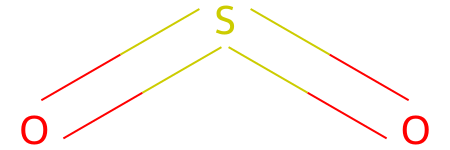

In [29]:
soo_pattern

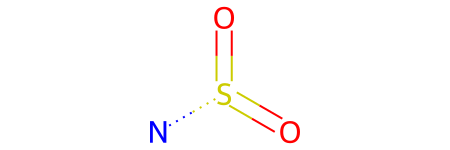

In [31]:
soon_pattern

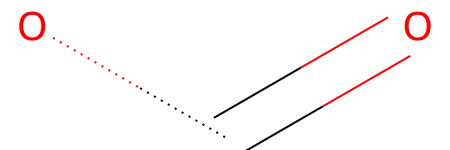

In [32]:
cooh_pattern

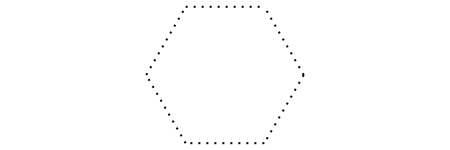

In [43]:
benzene_pattern

In [44]:
def printSummary(pattern, name_pattern,cox_ligands):
    counts_cox = [len(m.GetSubstructMatches(pattern)) for m in cox_ligands]
    counts_cox_nonzero = [m for m in counts_cox if m]
    print("Pocet ligandu v COX1 mnozine:\t\t\t",len(counts_cox),"\nPocet struktur, ktere maji",name_pattern,"skupinu:\t", len(counts_cox_nonzero),"\t=",round(len(counts_cox_nonzero)/len(counts_cox)*100,2),"%","\nPrumerny pocet",name_pattern,"skupin na jednu molekulu:\t", sum(counts_cox_nonzero)/len(counts_cox_nonzero),"\nMaximalni pocet",name_pattern,"skupin v jedne molekule:\t",max(counts_cox_nonzero),"\n\nPS: (prumerny pocet",name_pattern,"skupin na molekuly, ktere obsahuji",name_pattern,"skupinu)\n\n")

Obecné shrnutí, kolik daných struktur se nachází v množině COX1

In [47]:
printSummary(soo_pattern, 'SOO',cox_ligands)
printSummary(soon_pattern, 'SOON',cox_ligands)
printSummary(cooh_pattern, 'COO',cox_ligands)
printSummary(benzene_pattern, 'bezene',cox_ligands)

Pocet ligandu v COX1 mnozine:			 3193 
Pocet struktur, ktere maji SOO skupinu:	 1870 	= 58.57 % 
Prumerny pocet SOO skupin na jednu molekulu:	 1.0176470588235293 
Maximalni pocet SOO skupin v jedne molekule:	 2 

PS: (prumerny pocet SOO skupin na molekuly, ktere obsahuji SOO skupinu)


Pocet ligandu v COX1 mnozine:			 3193 
Pocet struktur, ktere maji SOON skupinu:	 843 	= 26.4 % 
Prumerny pocet SOON skupin na jednu molekulu:	 1.0166073546856464 
Maximalni pocet SOON skupin v jedne molekule:	 2 

PS: (prumerny pocet SOON skupin na molekuly, ktere obsahuji SOON skupinu)


Pocet ligandu v COX1 mnozine:			 3193 
Pocet struktur, ktere maji COO skupinu:	 475 	= 14.88 % 
Prumerny pocet COO skupin na jednu molekulu:	 1.0084210526315789 
Maximalni pocet COO skupin v jedne molekule:	 2 

PS: (prumerny pocet COO skupin na molekuly, ktere obsahuji COO skupinu)


Pocet ligandu v COX1 mnozine:			 3193 
Pocet struktur, ktere maji bezene skupinu:	 3116 	= 97.59 % 
Prumerny pocet bezene skupin na jednu

Prohledáme v naší množině molekuly a vytvoříme binární vektor se 4 booleovskými hodnotami, které indikují, které substruktury jsou v molekule obsaženy. Charakterizace struktur v množinách COX1 a DrugBanku pomocí tohoto 4bitového klíče.

**COX1**

In [48]:
custom_key = [soo_pattern,soon_pattern,cooh_pattern,benzene_pattern]
cox_ligands_keys = [[m.HasSubstructMatch(substruct) for substruct in custom_key] for m in cox_ligands]
len(cox_ligands_keys), cox_ligands_keys

(3193,
 [[True, True, False, True],
  [True, True, False, True],
  [False, False, False, True],
  [False, False, True, True],
  [True, False, False, True],
  [True, False, False, True],
  [False, False, True, True],
  [True, False, False, True],
  [False, False, False, True],
  [False, False, True, True],
  [False, False, False, True],
  [False, False, False, True],
  [True, True, False, True],
  [False, False, False, True],
  [False, False, False, True],
  [False, False, False, True],
  [False, False, False, True],
  [False, False, False, True],
  [True, False, False, True],
  [False, False, False, True],
  [True, False, False, True],
  [False, False, True, True],
  [False, False, False, True],
  [False, False, True, True],
  [True, False, False, True],
  [True, True, False, True],
  [True, False, False, True],
  [False, False, False, True],
  [False, False, False, True],
  [False, False, False, True],
  [True, True, False, True],
  [True, True, False, True],
  [True, False, False, Tr

Každá molekula v naší sadě ligandů je reprezentována čtyřmi bity, které odpovídají přítomnosti našich čtyř vlastních definovaných substruktur. Toto je jednoduchý příklad, strukturní klíče mají často stovky bitů. Existuje několik již zavedených sad funkcí podstruktury, které lze použít, pokud nejdeme po konkrétních podstrukturách a jedná se nám jen o obecnou charakteristiku sady struktur. Tyto obecné klíče můžete kdykoli rozšířit o jakékoli explicitní skupiny, na které se chcete zaměřit.

# MACCS key
- často používaný strukturní klíč skládající se ze 166 definovaných [substruktur zájmu](https://github.com/openbabel/openbabel/blob/master/data/MACCS.txt), implementovaných také v RDKit. 

MACCS key budou dále použity k charakterizaci ligandů na COX1 a databázi DrugBank:

In [50]:
from rdkit.Chem import MACCSkeys

In [51]:
cox_maccs = [MACCSkeys.GenMACCSKeys(m) for m in cox_ligands]
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugs]
cox_maccs[0]

Stejně jako u vlastních substrukturních klíčů je každá molekula reprezentována vektorem binárních hodnot. V implementaci RDKit je binární vektor implementován, protože objekt RDKit má několik pěkných [vestavěných binárních vektorových operací](https://www.rdkit.org/docs/source/rdkit.DataStructs.cDataStructs.html):

In [52]:
cox_maccs[0].GetNumBits() # get size of the vector

167

In [53]:
list(cox_maccs[0].GetOnBits()) # get indices of the bits that are set to True within the fingerprint

[32,
 33,
 51,
 55,
 58,
 59,
 60,
 61,
 64,
 67,
 69,
 72,
 73,
 78,
 81,
 84,
 88,
 93,
 94,
 102,
 106,
 112,
 113,
 117,
 119,
 124,
 125,
 126,
 127,
 130,
 131,
 133,
 135,
 136,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 148,
 150,
 151,
 152,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165]

In [54]:
cox_maccs[0].ToBitString() # write out the bit values in a string

'00000000000000000000000000000000110000000000000000010001001111001001010011000010010010001000011000000010001000001100010100001111001101011001101111101011100011111111110'

Použití substrukturních klíčů MACCS k porovnání relativního množství substruktur v rámci naší sady ligandů a obsahu DrugBank:

In [56]:
cox_ligands_maccs_sums = [0]*cox_maccs[0].GetNumBits() # a list of zeros of a given length
for key in cox_maccs:
    for onbit in key.GetOnBits():
        cox_ligands_maccs_sums[onbit] += 1
print(cox_ligands_maccs_sums)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 15, 0, 11, 0, 1, 2, 17, 0, 19, 0, 13, 74, 78, 130, 51, 56, 4, 50, 0, 0, 18, 884, 886, 41, 35, 379, 28, 262, 3, 14, 62, 1367, 20, 36, 39, 120, 321, 33, 139, 611, 1876, 744, 178, 146, 1870, 57, 940, 1889, 1846, 1870, 1896, 2065, 88, 1829, 1758, 408, 1934, 19, 857, 168, 195, 404, 1881, 405, 1304, 653, 603, 236, 673, 1022, 2029, 152, 1949, 683, 783, 215, 1521, 2114, 734, 313, 294, 650, 1702, 1419, 679, 2176, 624, 1035, 784, 344, 1056, 2002, 814, 375, 1099, 1491, 1964, 209, 570, 764, 607, 2335, 1490, 252, 290, 386, 1446, 775, 335, 1619, 2004, 1476, 984, 2305, 2832, 1023, 1646, 440, 619, 1976, 592, 762, 1450, 1975, 1396, 2218, 2582, 346, 924, 1057, 546, 1725, 1646, 2532, 2853, 1845, 831, 2414, 1312, 2758, 1218, 1797, 930, 1628, 1032, 2314, 1839, 1823, 2977, 2552, 2356, 3140, 3185, 3166, 3187, 48]


In [57]:
drugbank_maccs_sums = [0]*drugbank_maccs[0].GetNumBits() # a list of zeros of a given length
for key in drugbank_maccs:
    for onbit in key.GetOnBits():
        drugbank_maccs_sums[onbit] += 1
print(drugbank_maccs_sums)

[0, 0, 0, 30, 0, 1, 11, 25, 100, 46, 22, 118, 30, 60, 33, 11, 53, 77, 68, 283, 7, 21, 182, 212, 435, 565, 224, 96, 149, 726, 126, 23, 431, 481, 153, 44, 625, 521, 1313, 153, 167, 166, 698, 1198, 267, 246, 195, 455, 869, 713, 646, 601, 553, 1896, 2246, 663, 178, 1633, 669, 604, 685, 695, 1753, 207, 624, 2508, 1118, 782, 133, 1551, 295, 526, 2196, 755, 1184, 2092, 797, 2246, 703, 2263, 2297, 1228, 2080, 2782, 2110, 2498, 1685, 1311, 1596, 2474, 3533, 3342, 2825, 1650, 1481, 3191, 3099, 2784, 3058, 1145, 2845, 2777, 1935, 787, 3210, 2941, 2667, 1536, 1732, 2372, 3113, 3377, 2726, 2292, 1097, 1828, 1896, 3354, 3347, 924, 3225, 3763, 2973, 2791, 2465, 3449, 2547, 3821, 2689, 2850, 1793, 4639, 3554, 2718, 1639, 2199, 3265, 4494, 2581, 4291, 3262, 1352, 4170, 3821, 2803, 3700, 4375, 3396, 3795, 2507, 3940, 4408, 3963, 4550, 4670, 4851, 5255, 5253, 5351, 5676, 4234, 5681, 5175, 5799, 6506, 6133, 163]


Jelikož jsou velikosti jednotlivých množin odlišné, může být dobrý nápad rozdělit počty hrubých výskytů celkovou velikostí sady, čímž získáme procentuální zastoupení dané struktury.

In [60]:
cox_ligands_maccs_scaled = [round(x/len(cox_maccs),2) for x in cox_ligands_maccs_sums]
print(cox_ligands_maccs_scaled)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.01, 0.0, 0.0, 0.02, 0.02, 0.04, 0.02, 0.02, 0.0, 0.02, 0.0, 0.0, 0.01, 0.28, 0.28, 0.01, 0.01, 0.12, 0.01, 0.08, 0.0, 0.0, 0.02, 0.43, 0.01, 0.01, 0.01, 0.04, 0.1, 0.01, 0.04, 0.19, 0.59, 0.23, 0.06, 0.05, 0.59, 0.02, 0.29, 0.59, 0.58, 0.59, 0.59, 0.65, 0.03, 0.57, 0.55, 0.13, 0.61, 0.01, 0.27, 0.05, 0.06, 0.13, 0.59, 0.13, 0.41, 0.2, 0.19, 0.07, 0.21, 0.32, 0.64, 0.05, 0.61, 0.21, 0.25, 0.07, 0.48, 0.66, 0.23, 0.1, 0.09, 0.2, 0.53, 0.44, 0.21, 0.68, 0.2, 0.32, 0.25, 0.11, 0.33, 0.63, 0.25, 0.12, 0.34, 0.47, 0.62, 0.07, 0.18, 0.24, 0.19, 0.73, 0.47, 0.08, 0.09, 0.12, 0.45, 0.24, 0.1, 0.51, 0.63, 0.46, 0.31, 0.72, 0.89, 0.32, 0.52, 0.14, 0.19, 0.62, 0.19, 0.24, 0.45, 0.62, 0.44, 0.69, 0.81, 0.11, 0.29, 0.33, 0.17, 0.54, 0.52, 0.79, 0.89, 0.58, 0.26, 0.76, 0.41, 0.86, 0.38, 0.56, 0.29, 0.51, 0.32, 0.72, 0.58, 0.57, 0.93, 0.8, 0.74, 0.98, 1.0, 0.99, 1.0, 0.02]


In [61]:
drugbank_maccs_scaled = [round(x/len(drugbank_maccs),2) for x in drugbank_maccs_sums]
print(drugbank_maccs_scaled)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.0, 0.02, 0.0, 0.01, 0.0, 0.0, 0.01, 0.01, 0.01, 0.04, 0.0, 0.0, 0.03, 0.03, 0.06, 0.08, 0.03, 0.01, 0.02, 0.1, 0.02, 0.0, 0.06, 0.07, 0.02, 0.01, 0.09, 0.07, 0.18, 0.02, 0.02, 0.02, 0.1, 0.17, 0.04, 0.03, 0.03, 0.06, 0.12, 0.1, 0.09, 0.08, 0.08, 0.27, 0.32, 0.09, 0.03, 0.23, 0.09, 0.08, 0.1, 0.1, 0.25, 0.03, 0.09, 0.35, 0.16, 0.11, 0.02, 0.22, 0.04, 0.07, 0.31, 0.11, 0.17, 0.29, 0.11, 0.32, 0.1, 0.32, 0.32, 0.17, 0.29, 0.39, 0.3, 0.35, 0.24, 0.18, 0.22, 0.35, 0.5, 0.47, 0.4, 0.23, 0.21, 0.45, 0.44, 0.39, 0.43, 0.16, 0.4, 0.39, 0.27, 0.11, 0.45, 0.41, 0.37, 0.22, 0.24, 0.33, 0.44, 0.47, 0.38, 0.32, 0.15, 0.26, 0.27, 0.47, 0.47, 0.13, 0.45, 0.53, 0.42, 0.39, 0.35, 0.48, 0.36, 0.54, 0.38, 0.4, 0.25, 0.65, 0.5, 0.38, 0.23, 0.31, 0.46, 0.63, 0.36, 0.6, 0.46, 0.19, 0.59, 0.54, 0.39, 0.52, 0.61, 0.48, 0.53, 0.35, 0.55, 0.62, 0.56, 0.64, 0.66, 0.68, 0.74, 0.74, 0.75, 0.8, 0.6, 0.8, 0.73, 0.82, 0.91, 0.86, 0.02]


Máme poměr výskytu každé podstruktury MACCS v naší sadě a v DrugBank. Nyní můžeme tyto dva odečíst a podívat se na rozdíly:

In [62]:
# compute the differences, store bit numbers prior to sorting
cox_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(cox_ligands_maccs_scaled, drugbank_maccs_scaled))]
cox_drugbank_differences

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, -0.01),
 (9, -0.01),
 (10, 0.0),
 (11, -0.02),
 (12, 0.0),
 (13, -0.01),
 (14, 0.0),
 (15, 0.0),
 (16, -0.01),
 (17, 0.0),
 (18, -0.01),
 (19, -0.03),
 (20, 0.0),
 (21, 0.0),
 (22, -0.009999999999999998),
 (23, -0.009999999999999998),
 (24, -0.019999999999999997),
 (25, -0.06),
 (26, -0.009999999999999998),
 (27, -0.01),
 (28, 0.0),
 (29, -0.1),
 (30, -0.02),
 (31, 0.01),
 (32, 0.22000000000000003),
 (33, 0.21000000000000002),
 (34, -0.01),
 (35, 0.0),
 (36, 0.03),
 (37, -0.060000000000000005),
 (38, -0.09999999999999999),
 (39, -0.02),
 (40, -0.02),
 (41, 0.0),
 (42, 0.32999999999999996),
 (43, -0.16),
 (44, -0.03),
 (45, -0.019999999999999997),
 (46, 0.010000000000000002),
 (47, 0.04000000000000001),
 (48, -0.11),
 (49, -0.060000000000000005),
 (50, 0.1),
 (51, 0.51),
 (52, 0.15000000000000002),
 (53, -0.21000000000000002),
 (54, -0.27),
 (55, 0.5),
 (56, -0.009999999999999998),
 (57, 0.05999

In [63]:
# let's sort the bits by the difference in MACCS incidence between our ligand set and the DrugBank database
cox_drugbank_differences.sort(key=lambda x: x[1])
cox_drugbank_differences

[(131, -0.46),
 (90, -0.4),
 (91, -0.38),
 (155, -0.36000000000000004),
 (153, -0.35000000000000003),
 (104, -0.33),
 (139, -0.31),
 (100, -0.29000000000000004),
 (111, -0.27999999999999997),
 (54, -0.27),
 (132, -0.26),
 (138, -0.25),
 (95, -0.24000000000000002),
 (82, -0.24),
 (128, -0.24),
 (151, -0.24),
 (118, -0.22999999999999998),
 (147, -0.21999999999999997),
 (53, -0.21000000000000002),
 (129, -0.21000000000000002),
 (92, -0.2),
 (110, -0.2),
 (97, -0.19),
 (158, -0.18000000000000005),
 (72, -0.18),
 (115, -0.17),
 (86, -0.16999999999999998),
 (108, -0.16999999999999998),
 (157, -0.16000000000000003),
 (43, -0.16),
 (109, -0.15000000000000002),
 (116, -0.15000000000000002),
 (154, -0.15000000000000002),
 (77, -0.13),
 (140, -0.13),
 (89, -0.11999999999999997),
 (79, -0.11000000000000001),
 (48, -0.11),
 (98, -0.10999999999999999),
 (29, -0.1),
 (38, -0.09999999999999999),
 (85, -0.09999999999999998),
 (84, -0.09),
 (123, -0.08000000000000002),
 (114, -0.06999999999999999),
 (10

Výpis struktur, které byly častější

In [64]:
smartsPatts={
1:('?',0), # ISOTOPE
#2:('[#104,#105,#106,#107,#106,#109,#110,#111,#112]',0),  # atomic num >103 Not complete
2:('[#104]',0),  # limit the above def'n since the RDKit only accepts up to #104
3:('[#32,#33,#34,#50,#51,#52,#82,#83,#84]',0), # Group IVa,Va,VIa Rows 4-6 
4:('[Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr]',0), # actinide
5:('[Sc,Ti,Y,Zr,Hf]',0), # Group IIIB,IVB (Sc...)  
6:('[La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu]',0), # Lanthanide
7:('[V,Cr,Mn,Nb,Mo,Tc,Ta,W,Re]',0), # Group VB,VIB,VIIB
8:('[!#6;!#1]1~*~*~*~1',0), # QAAA@1
9:('[Fe,Co,Ni,Ru,Rh,Pd,Os,Ir,Pt]',0), # Group VIII (Fe...)
10:('[Be,Mg,Ca,Sr,Ba,Ra]',0), # Group IIa (Alkaline earth)
11:('*1~*~*~*~1',0), # 4M Ring
12:('[Cu,Zn,Ag,Cd,Au,Hg]',0), # Group IB,IIB (Cu..)
13:('[#8]~[#7](~[#6])~[#6]',0), # ON(C)C
14:('[#16]-[#16]',0), # S-S
15:('[#8]~[#6](~[#8])~[#8]',0), # OC(O)O
16:('[!#6;!#1]1~*~*~1',0), # QAA@1
17:('[#6]#[#6]',0), #CTC
18:('[#5,#13,#31,#49,#81]',0), # Group IIIA (B...) 
19:('*1~*~*~*~*~*~*~1',0), # 7M Ring
20:('[#14]',0), #Si
21:('[#6]=[#6](~[!#6;!#1])~[!#6;!#1]',0), # C=C(Q)Q
22:('*1~*~*~1',0), # 3M Ring
23:('[#7]~[#6](~[#8])~[#8]',0), # NC(O)O
24:('[#7]-[#8]',0), # N-O
25:('[#7]~[#6](~[#7])~[#7]',0), # NC(N)N
26:('[#6]=;@[#6](@*)@*',0), # C$=C($A)$A
27:('[I]',0), # I
28:('[!#6;!#1]~[CH2]~[!#6;!#1]',0), # QCH2Q
29:('[#15]',0),# P
30:('[#6]~[!#6;!#1](~[#6])(~[#6])~*',0), # CQ(C)(C)A
31:('[!#6;!#1]~[F,Cl,Br,I]',0), # QX
32:('[#6]~[#16]~[#7]',0), # CSN
33:('[#7]~[#16]',0), # NS
34:('[CH2]=*',0), # CH2=A
35:('[Li,Na,K,Rb,Cs,Fr]',0), # Group IA (Alkali Metal)
36:('[#16R]',0), # S Heterocycle
37:('[#7]~[#6](~[#8])~[#7]',0), # NC(O)N
38:('[#7]~[#6](~[#6])~[#7]',0), # NC(C)N
39:('[#8]~[#16](~[#8])~[#8]',0), # OS(O)O
40:('[#16]-[#8]',0), # S-O
41:('[#6]#[#7]',0), # CTN
42:('F',0), # F
43:('[!#6;!#1;!H0]~*~[!#6;!#1;!H0]',0), # QHAQH
44:('?',0), # OTHER
45:('[#6]=[#6]~[#7]',0), # C=CN
46:('Br',0), # BR
47:('[#16]~*~[#7]',0), # SAN
48:('[#8]~[!#6;!#1](~[#8])(~[#8])',0), # OQ(O)O
49:('[!+0]',0), # CHARGE  
50:('[#6]=[#6](~[#6])~[#6]',0), # C=C(C)C
51:('[#6]~[#16]~[#8]',0), # CSO
52:('[#7]~[#7]',0), # NN
53:('[!#6;!#1;!H0]~*~*~*~[!#6;!#1;!H0]',0), # QHAAAQH
54:('[!#6;!#1;!H0]~*~*~[!#6;!#1;!H0]',0), # QHAAQH
55:('[#8]~[#16]~[#8]',0), #OSO
56:('[#8]~[#7](~[#8])~[#6]',0), # ON(O)C
57:('[#8R]',0), # O Heterocycle
58:('[!#6;!#1]~[#16]~[!#6;!#1]',0), # QSQ
59:('[#16]!:*:*',0), # Snot%A%A
60:('[#16]=[#8]',0), # S=O
61:('*~[#16](~*)~*',0), # AS(A)A
62:('*@*!@*@*',0), # A$!A$A
63:('[#7]=[#8]',0), # N=O
64:('*@*!@[#16]',0), # A$A!S
65:('c:n',0), # C%N
66:('[#6]~[#6](~[#6])(~[#6])~*',0), # CC(C)(C)A
67:('[!#6;!#1]~[#16]',0), # QS
68:('[!#6;!#1;!H0]~[!#6;!#1;!H0]',0), # QHQH (&...) SPEC Incomplete
69:('[!#6;!#1]~[!#6;!#1;!H0]',0), # QQH
70:('[!#6;!#1]~[#7]~[!#6;!#1]',0), # QNQ
71:('[#7]~[#8]',0), # NO
72:('[#8]~*~*~[#8]',0), # OAAO
73:('[#16]=*',0), # S=A
74:('[CH3]~*~[CH3]',0), # CH3ACH3
75:('*!@[#7]@*',0), # A!N$A
76:('[#6]=[#6](~*)~*',0), # C=C(A)A
77:('[#7]~*~[#7]',0), # NAN
78:('[#6]=[#7]',0), # C=N
79:('[#7]~*~*~[#7]',0), # NAAN
80:('[#7]~*~*~*~[#7]',0), # NAAAN
81:('[#16]~*(~*)~*',0), # SA(A)A
82:('*~[CH2]~[!#6;!#1;!H0]',0), # ACH2QH
83:('[!#6;!#1]1~*~*~*~*~1',0), # QAAAA@1
84:('[NH2]',0), #NH2
85:('[#6]~[#7](~[#6])~[#6]',0), # CN(C)C
86:('[C;H2,H3][!#6;!#1][C;H2,H3]',0), # CH2QCH2
87:('[F,Cl,Br,I]!@*@*',0), # X!A$A
88:('[#16]',0), # S
89:('[#8]~*~*~*~[#8]',0), # OAAAO
90:('[$([!#6;!#1;!H0]~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[CH2;R]1)]',0), # QHAACH2A
91:('[$([!#6;!#1;!H0]~*~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~*~[R]1@[R]@[CH2;R]1)]',0), # QHAAACH2A
92:('[#8]~[#6](~[#7])~[#6]',0), # OC(N)C
93:('[!#6;!#1]~[CH3]',0), # QCH3
94:('[!#6;!#1]~[#7]',0), # QN
95:('[#7]~*~*~[#8]',0), # NAAO
96:('*1~*~*~*~*~1',0), # 5 M ring
97:('[#7]~*~*~*~[#8]',0), # NAAAO
98:('[!#6;!#1]1~*~*~*~*~*~1',0), # QAAAAA@1
99:('[#6]=[#6]',0), # C=C
100:('*~[CH2]~[#7]',0), # ACH2N
101:('[$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1)]',0), # 8M Ring or larger. This only handles up to ring sizes of 14
102:('[!#6;!#1]~[#8]',0), # QO
103:('Cl',0), # CL
104:('[!#6;!#1;!H0]~*~[CH2]~*',0), # QHACH2A
105:('*@*(@*)@*',0), # A$A($A)$A
106:('[!#6;!#1]~*(~[!#6;!#1])~[!#6;!#1]',0), # QA(Q)Q
107:('[F,Cl,Br,I]~*(~*)~*',0), # XA(A)A
108:('[CH3]~*~*~*~[CH2]~*',0), # CH3AAACH2A
109:('*~[CH2]~[#8]',0), # ACH2O
110:('[#7]~[#6]~[#8]',0), # NCO
111:('[#7]~*~[CH2]~*',0), # NACH2A
112:('*~*(~*)(~*)~*',0), # AA(A)(A)A
113:('[#8]!:*:*',0), # Onot%A%A
114:('[CH3]~[CH2]~*',0), # CH3CH2A
115:('[CH3]~*~[CH2]~*',0), # CH3ACH2A
116:('[$([CH3]~*~*~[CH2]~*),$([CH3]~*1~*~[CH2]1)]',0), # CH3AACH2A
117:('[#7]~*~[#8]',0), # NAO
118:('[$(*~[CH2]~[CH2]~*),$(*1~[CH2]~[CH2]1)]',1), # ACH2CH2A > 1
119:('[#7]=*',0), # N=A
120:('[!#6;R]',1), # Heterocyclic atom > 1 (&...) Spec Incomplete
121:('[#7;R]',0), # N Heterocycle
122:('*~[#7](~*)~*',0), # AN(A)A
123:('[#8]~[#6]~[#8]',0), # OCO
124:('[!#6;!#1]~[!#6;!#1]',0), # QQ
125:('?',0), # Aromatic Ring > 1
126:('*!@[#8]!@*',0), # A!O!A
127:('*@*!@[#8]',1), # A$A!O > 1 (&...) Spec Incomplete
128:('[$(*~[CH2]~*~*~*~[CH2]~*),$([R]1@[CH2;R]@[R]@[R]@[R]@[CH2;R]1),$(*~[CH2]~[R]1@[R]@[R]@[CH2;R]1),$(*~[CH2]~*~[R]1@[R]@[CH2;R]1)]',0), # ACH2AAACH2A
129:('[$(*~[CH2]~*~*~[CH2]~*),$([R]1@[CH2]@[R]@[R]@[CH2;R]1),$(*~[CH2]~[R]1@[R]@[CH2;R]1)]',0), # ACH2AACH2A
130:('[!#6;!#1]~[!#6;!#1]',1), # QQ > 1 (&...)  Spec Incomplete
131:('[!#6;!#1;!H0]',1), # QH > 1
132:('[#8]~*~[CH2]~*',0), # OACH2A
133:('*@*!@[#7]',0), # A$A!N
134:('[F,Cl,Br,I]',0), # X (HALOGEN)
135:('[#7]!:*:*',0), # Nnot%A%A
136:('[#8]=*',1), # O=A>1 
137:('[!C;!c;R]',0), # Heterocycle
138:('[!#6;!#1]~[CH2]~*',1), # QCH2A>1 (&...) Spec Incomplete
139:('[O;!H0]',0), # OH
140:('[#8]',3), # O > 3 (&...) Spec Incomplete
141:('[CH3]',2), # CH3 > 2  (&...) Spec Incomplete
142:('[#7]',1), # N > 1
143:('*@*!@[#8]',0), # A$A!O
144:('*!:*:*!:*',0), # Anot%A%Anot%A
145:('*1~*~*~*~*~*~1',1), # 6M ring > 1
146:('[#8]',2), # O > 2
147:('[$(*~[CH2]~[CH2]~*),$([R]1@[CH2;R]@[CH2;R]1)]',0), # ACH2CH2A
148:('*~[!#6;!#1](~*)~*',0), # AQ(A)A
149:('[C;H3,H4]',1), # CH3 > 1
150:('*!@*@*!@*',0), # A!A$A!A
151:('[#7;!H0]',0), # NH
152:('[#8]~[#6](~[#6])~[#6]',0), # OC(C)C
153:('[!#6;!#1]~[CH2]~*',0), # QCH2A
154:('[#6]=[#8]',0), # C=O
155:('*!@[CH2]!@*',0), # A!CH2!A
156:('[#7]~*(~*)~*',0), # NA(A)A
157:('[#6]-[#8]',0), # C-O
158:('[#6]-[#7]',0), # C-N
159:('[#8]',1), # O>1
160:('[C;H3,H4]',0), #CH3
161:('[#7]',0), # N
162:('a',0), # Aromatic
163:('*1~*~*~*~*~*~1',0), # 6M Ring
164:('[#8]',0), # O
165:('[R]',0), # Ring
166:('?',0), # Fragments  FIX: this can't be done in SMARTS
}

In [81]:
len(smartsPatts)
# smartsPatts[1][0] - znaci smarts 
# smartsPatts[1][1] - znaci pocet, ktery obsahuje dana struktura, aby se pocitala jako 1 v CMACCS
print(smartsPatts[1][0])
Chem.MolFromSmarts(smartsPatts[1][0])

?


RDKit ERROR: [16:56:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 199 in file /opt/conda/conda-bld/rdkit_1603173682698/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:58:14] SMARTS Parse Error: syntax error while parsing: ?
RDKit ERROR: [16:58:14] SMARTS Parse Error: Failed parsing SMARTS '?' for input: '?'


- COX1 množinu

In [131]:
[print(d[0],': ',smartsPatts[d[0]][0],'   pocet: ',smartsPatts[d[0]][1],"\no kolik % vice: ", round(d[1],2),'\n') for d in cox_drugbank_differences if d[1]>0]

31 :  [!#6;!#1]~[F,Cl,Br,I]    pocet:  0 
o kolik % vice:  0.01 

46 :  Br    pocet:  0 
o kolik % vice:  0.01 

70 :  [!#6;!#1]~[#7]~[!#6;!#1]    pocet:  0 
o kolik % vice:  0.01 

36 :  [#16R]    pocet:  0 
o kolik % vice:  0.03 

47 :  [#16]~*~[#7]    pocet:  0 
o kolik % vice:  0.04 

122 :  *~[#7](~*)~*    pocet:  0 
o kolik % vice:  0.04 

69 :  [!#6;!#1]~[!#6;!#1;!H0]    pocet:  0 
o kolik % vice:  0.05 

57 :  [#8R]    pocet:  0 
o kolik % vice:  0.06 

120 :  [!#6;R]    pocet:  1 
o kolik % vice:  0.06 

149 :  [C;H3,H4]    pocet:  1 
o kolik % vice:  0.06 

133 :  *@*!@[#7]    pocet:  0 
o kolik % vice:  0.07 

164 :  [#8]    pocet:  0 
o kolik % vice:  0.08 

99 :  [#6]=[#6]    pocet:  0 
o kolik % vice:  0.09 

76 :  [#6]=[#6](~*)~*    pocet:  0 
o kolik % vice:  0.09 

106 :  [!#6;!#1]~*(~[!#6;!#1])~[!#6;!#1]    pocet:  0 
o kolik % vice:  0.1 

121 :  [#7;R]    pocet:  0 
o kolik % vice:  0.1 

50 :  [#6]=[#6](~[#6])~[#6]    pocet:  0 
o kolik % vice:  0.1 

75 :  *!@[#7]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

- databázi DrugBank

In [132]:
[print(d[0],': ',smartsPatts[d[0]][0],'  pocet: ',smartsPatts[d[0]][1],"\no kolik % vice: ", round(abs(d[1]),2),'\n') for d in cox_drugbank_differences if d[1]<0]

131 :  [!#6;!#1;!H0]   pocet:  1 
o kolik % vice:  0.46 

90 :  [$([!#6;!#1;!H0]~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[CH2;R]1)]   pocet:  0 
o kolik % vice:  0.4 

91 :  [$([!#6;!#1;!H0]~*~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~*~[R]1@[R]@[CH2;R]1)]   pocet:  0 
o kolik % vice:  0.38 

155 :  *!@[CH2]!@*   pocet:  0 
o kolik % vice:  0.36 

153 :  [!#6;!#1]~[CH2]~*   pocet:  0 
o kolik % vice:  0.35 

104 :  [!#6;!#1;!H0]~*~[CH2]~*   pocet:  0 
o kolik % vice:  0.33 

139 :  [O;!H0]   pocet:  0 
o kolik % vice:  0.31 

100 :  *~[CH2]~[#7]   pocet:  0 
o kolik % vice:  0.29 

111 :  [#7]~*~[CH2]~*   pocet:  0 
o kolik % vice:  0.28 

54 :  [!#6;!#1;!H0]~*~*~[!#6;!#1;!H0]   pocet:  0 
o kolik % vice:  0.27 

132 :  [#8]~*~[CH2]~*   pocet:  0 
o kolik % vice:  0.26 

138 :  [!#6;!#1]~[CH2]~*   pocet:  1 
o kolik % vice:  0.25 

95 :  [#7]~*~*~[#8]   pocet:  0 
o kolik % vice:  0.24

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

- byly stejné pro obě množiny

In [134]:
[print(d[0],': ',smartsPatts[d[0]][0],'  pocet: ',smartsPatts[d[0]][1],"\no kolik % vice: ", round(d[1],2),'\n') for d in cox_drugbank_differences if round(d[1] == 0) and d[0]!=0]

1 :  ?   pocet:  0 
o kolik % vice:  0.0 

2 :  [#104]   pocet:  0 
o kolik % vice:  0.0 

3 :  [#32,#33,#34,#50,#51,#52,#82,#83,#84]   pocet:  0 
o kolik % vice:  0.0 

4 :  [Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr]   pocet:  0 
o kolik % vice:  0.0 

5 :  [Sc,Ti,Y,Zr,Hf]   pocet:  0 
o kolik % vice:  0.0 

6 :  [La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu]   pocet:  0 
o kolik % vice:  0.0 

7 :  [V,Cr,Mn,Nb,Mo,Tc,Ta,W,Re]   pocet:  0 
o kolik % vice:  0.0 

10 :  [Be,Mg,Ca,Sr,Ba,Ra]   pocet:  0 
o kolik % vice:  0.0 

12 :  [Cu,Zn,Ag,Cd,Au,Hg]   pocet:  0 
o kolik % vice:  0.0 

14 :  [#16]-[#16]   pocet:  0 
o kolik % vice:  0.0 

15 :  [#8]~[#6](~[#8])~[#8]   pocet:  0 
o kolik % vice:  0.0 

17 :  [#6]#[#6]   pocet:  0 
o kolik % vice:  0.0 

20 :  [#14]   pocet:  0 
o kolik % vice:  0.0 

21 :  [#6]=[#6](~[!#6;!#1])~[!#6;!#1]   pocet:  0 
o kolik % vice:  0.0 

28 :  [!#6;!#1]~[CH2]~[!#6;!#1]   pocet:  0 
o kolik % vice:  0.0 

35 :  [Li,Na,K,Rb,Cs,Fr]   pocet:  0 
o kolik 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Bity MACCS, které jsou nejméně rozšířené v naší sadě ligandů COX1 ve srovnání s obsahem databáze DrugBank, jsou vypsány v předchozí buňce (131, 90, 91, 155, 153, 104, 139, atd.). Tyto bity odpovídají strukturálním vzorům [v definici klíče MACCS](https://github.com/openbabel/openbabel/blob/master/data/MACCS.txt)  

Nejběžnější bity MACCS v naší sadě ligandů MTOR ve srovnání s výchozí hodnotou DrugBank jsou (31, 46, 70, 36, 47, 122, 69, 57, atd.). 
